## Predict Dog breed usig Google Cloud ML

First load pretrained Keras model

In [19]:
#
# This cell has all the dependencies
#
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image                  
from tqdm import tqdm
from glob import glob
#from extract_bottleneck_features import *
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as xception_preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
import cv2
import random
import matplotlib.pyplot as plt                        
%matplotlib inline
import json

def save_dog_names(name_list, file_name):
    with open(file_name, 'w') as f:
      json.dump(name_list, f, ensure_ascii=False)
    
def load_dog_names(file_name):
    with open(file_name, 'r') as f:
        return json.load(f)

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def get_dog_breed(img_path):
    feature= xception.predict(xception_preprocess_input(path_to_tensor(img_path)))
    prediction= model.predict(feature)
    max= np.argmax(prediction)
    accuracy= prediction[0, max]* 100
    return dog_names[max], accuracy

def get_breed_example(breed):
    dogs= glob('../dog-breed/dogImages/train/*.{}/*'.format(breed))
    return dogs[random.randint(0,len(dogs)-1)]

def show_breed(label1, img1, label2, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), subplot_kw={'xticks': [], 'yticks': []})
    #fig.subplots_adjust(hspace=0.3, wspace=1.55)
    ax1.imshow(plt.imread(img1))
    ax1.set_title(label1)
    ax2.imshow(plt.imread(img2))
    ax2.set_title(label2)
    plt.show()

def show_image(img_path, label):
    fig, ax = plt.subplots(1, figsize=(8, 4), subplot_kw={'xticks': [], 'yticks': []})
    ax.imshow(plt.imread(img_path))
    ax.set_title(label)
    plt.show()
        
def face_detector(img_path):
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

def dog_detector(img_path):
    img = resnet50_preprocess_input(path_to_tensor(img_path))
    
    prediction = np.argmax(ResNet50_model.predict(img))
    return ((prediction <= 268) & (prediction >= 151))

def get_breed(img_path):
    if face_detector(img_path):
        label, acc= get_dog_breed(img_path)
        show_image(img_path, 'HUMAN "{}" ({:.3f} %)'.format(label, acc))
    elif dog_detector(img_path):
        label, acc= get_dog_breed(img_path)
        show_image(img_path, 'DOG "{}" ({:.3f} %)'.format(label, acc))
    else:
        show_image(img_path, "No human face or dog detected")
        
# Init data
dog_names= load_dog_names('dog_names.json')
xception= Xception(weights='imagenet', include_top=False)
ResNet50_model = ResNet50(weights='imagenet')
# save model to json
#with open("saved_models/model_Xception.json", "w") as file: file.write(model.to_json())
with open("saved_models/model_Xception.json", "r") as file: model= model_from_json(file.read())
model.load_weights('saved_models/weights.best.Xception.hdf5')

Test prediction with some images

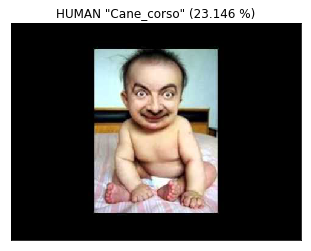

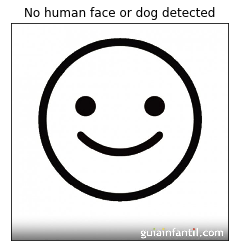

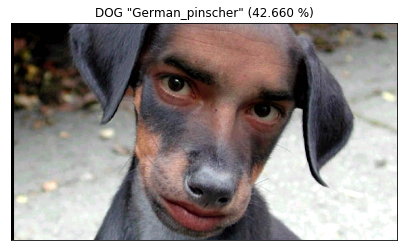

In [20]:
files= sorted(glob("test/*"))
for img_path in files:
    get_breed(img_path)